# Testing Analysis

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

In [3]:
def perform_corrected_internal_testing():
    """Perform internal testing using the original training datasets with train/test split"""
    print("🔬 STARTING CORRECTED INTERNAL TESTING ANALYSIS")
    print("="*60)
    
    # Load all necessary components
    base_path = r'..\..\Saved_files'
    
    components = {}
    try:
        # Load models
        with open(os.path.join(base_path, 'best_sub_model_1.pkl'), 'rb') as file:
            components['model_TB_Status'] = pickle.load(file)
        with open(os.path.join(base_path, 'best_sub_model_2.pkl'), 'rb') as file:
            components['model_TB_Type'] = pickle.load(file)
        with open(os.path.join(base_path, 'best_sub_model_3.pkl'), 'rb') as file:
            components['model_TB_Stage'] = pickle.load(file)
        
        # Load feature selectors
        with open(os.path.join(base_path, 'feature_selector_TB_Status.pkl'), 'rb') as file:
            components['feature_selector_TB_Status'] = pickle.load(file)
        with open(os.path.join(base_path, 'feature_selector_TB_Type.pkl'), 'rb') as file:
            components['feature_selector_TB_Type'] = pickle.load(file)
        with open(os.path.join(base_path, 'feature_selector_TB_Stage.pkl'), 'rb') as file:
            components['feature_selector_TB_Stage'] = pickle.load(file)
        
        # Load label encoders
        with open(os.path.join(base_path, 'label_encoder_TB_Status.pkl'), 'rb') as file:
            components['label_encoder_TB_Status'] = pickle.load(file)
        with open(os.path.join(base_path, 'label_encoder_TB_Type.pkl'), 'rb') as file:
            components['label_encoder_TB_Type'] = pickle.load(file)
        with open(os.path.join(base_path, 'label_encoder_TB_Stage.pkl'), 'rb') as file:
            components['label_encoder_TB_Stage'] = pickle.load(file)
        
        # Load scalers
        scaler_path = os.path.join(base_path, 'scalar')
        with open(os.path.join(scaler_path, 'scaler_TB_Status.pkl'), 'rb') as file:
            components['scaler_TB_Status'] = pickle.load(file)
        with open(os.path.join(scaler_path, 'scaler_TB_Type.pkl'), 'rb') as file:
            components['scaler_TB_Type'] = pickle.load(file)
        with open(os.path.join(scaler_path, 'scaler_TB_Stage.pkl'), 'rb') as file:
            components['scaler_TB_Stage'] = pickle.load(file)
            
        print("✅ All models and components loaded successfully!")
        
    except Exception as e:
        print(f"❌ Error loading components: {e}")
        return None, None
    
    # Load selected features
    selected_features = {}
    try:
        selected_features['TB_Status'] = pd.read_csv(
            os.path.join(base_path, 'selected_features_TB_HC_OD.csv')
        )['Selected Features'].tolist()
        selected_features['TB_Type'] = pd.read_csv(
            os.path.join(base_path, 'selected_features_PTB_EPTB.csv')
        )['Selected Features'].tolist()
        selected_features['TB_Stage'] = pd.read_csv(
            os.path.join(base_path, 'selected_features_ATB_LTB.csv')
        )['Selected Features'].tolist()
        print("✅ Selected features loaded successfully!")
    except Exception as e:
        print(f"❌ Error loading selected features: {e}")
        return None, None
    
    # Perform testing for each model using their respective datasets
    results = {}
    detailed_results = {}
    
    # Model 1: TB Status Testing using TB_HC_OD dataset
    print("\n📊 TESTING TB STATUS MODEL (TB_HC_OD Dataset)...")
    try:
        # Load the TB_HC_OD dataset
        tb_hc_od_path = r'..\..\Datasets\train\balanced\TB_HC_OD.csv'
        tb_hc_od_data = pd.read_csv(tb_hc_od_path)
        print(f"   ✅ TB_HC_OD dataset loaded: {tb_hc_od_data.shape}")
        
        # Prepare data
        X = tb_hc_od_data[selected_features['TB_Status']]
        y = tb_hc_od_data['TB_Status']
        
        # Split data (same as during training)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Apply feature selection to test data
        X_test_selected = components['feature_selector_TB_Status'].transform(X_test)
        
        # Make predictions
        y_pred_encoded = components['model_TB_Status'].predict(X_test_selected)
        y_pred = components['label_encoder_TB_Status'].inverse_transform(y_pred_encoded)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        
        results['TB_Status'] = {
            'accuracy': accuracy,
            'initial_features': len(selected_features['TB_Status']),
            'final_features': X_test_selected.shape[1],
            'samples': len(y_test),
            'dataset': 'TB_HC_OD'
        }
        
        detailed_results['TB_Status'] = {
            'true_labels': y_test,
            'pred_labels': y_pred,
            'classification_report': classification_report(y_test, y_pred, output_dict=True)
        }
        
        print(f"   ✅ Accuracy: {accuracy:.4f}")
        print(f"   ✅ Features: {len(selected_features['TB_Status'])} → {X_test_selected.shape[1]}")
        print(f"   ✅ Test Samples: {len(y_test)}")
        
    except Exception as e:
        print(f"   ❌ Error in TB Status testing: {e}")
        results['TB_Status'] = {'error': str(e)}
    
    # Model 2: TB Type Testing using PTB_EPTB dataset
    print("\n📊 TESTING TB TYPE MODEL (PTB_EPTB Dataset)...")
    try:
        # Load the PTB_EPTB dataset
        ptb_eptb_path = r'..\..\Datasets\train\balanced\PTB_EPTB.csv'
        ptb_eptb_data = pd.read_csv(ptb_eptb_path)
        print(f"   ✅ PTB_EPTB dataset loaded: {ptb_eptb_data.shape}")
        
        # Prepare data
        X = ptb_eptb_data[selected_features['TB_Type']]
        y = ptb_eptb_data['TB_Status']  # This should be Pulmonary TB vs Extra Pulmonary TB
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Apply feature selection to test data
        X_test_selected = components['feature_selector_TB_Type'].transform(X_test)
        
        # Make predictions
        y_pred_encoded = components['model_TB_Type'].predict(X_test_selected)
        y_pred = components['label_encoder_TB_Type'].inverse_transform(y_pred_encoded)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        
        results['TB_Type'] = {
            'accuracy': accuracy,
            'initial_features': len(selected_features['TB_Type']),
            'final_features': X_test_selected.shape[1],
            'samples': len(y_test),
            'dataset': 'PTB_EPTB'
        }
        
        detailed_results['TB_Type'] = {
            'true_labels': y_test,
            'pred_labels': y_pred,
            'classification_report': classification_report(y_test, y_pred, output_dict=True)
        }
        
        print(f"   ✅ Accuracy: {accuracy:.4f}")
        print(f"   ✅ Features: {len(selected_features['TB_Type'])} → {X_test_selected.shape[1]}")
        print(f"   ✅ Test Samples: {len(y_test)}")
        
    except Exception as e:
        print(f"   ❌ Error in TB Type testing: {e}")
        results['TB_Type'] = {'error': str(e)}
    
    # Model 3: TB Stage Testing using ATB_LTB dataset
    print("\n📊 TESTING TB STAGE MODEL (ATB_LTB Dataset)...")
    try:
        # Load the ATB_LTB dataset
        atb_ltb_path = r'..\..\Datasets\train\balanced\ATB_LTB.csv'
        atb_ltb_data = pd.read_csv(atb_ltb_path)
        print(f"   ✅ ATB_LTB dataset loaded: {atb_ltb_data.shape}")
        
        # Prepare data
        X = atb_ltb_data[selected_features['TB_Stage']]
        y = atb_ltb_data['TB_Status']  # This should be Active TB vs Latent TB
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Apply feature selection to test data
        X_test_selected = components['feature_selector_TB_Stage'].transform(X_test)
        
        # Make predictions
        y_pred_encoded = components['model_TB_Stage'].predict(X_test_selected)
        y_pred = components['label_encoder_TB_Stage'].inverse_transform(y_pred_encoded)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        
        results['TB_Stage'] = {
            'accuracy': accuracy,
            'initial_features': len(selected_features['TB_Stage']),
            'final_features': X_test_selected.shape[1],
            'samples': len(y_test),
            'dataset': 'ATB_LTB'
        }
        
        detailed_results['TB_Stage'] = {
            'true_labels': y_test,
            'pred_labels': y_pred,
            'classification_report': classification_report(y_test, y_pred, output_dict=True)
        }
        
        print(f"   ✅ Accuracy: {accuracy:.4f}")
        print(f"   ✅ Features: {len(selected_features['TB_Stage'])} → {X_test_selected.shape[1]}")
        print(f"   ✅ Test Samples: {len(y_test)}")
        
    except Exception as e:
        print(f"   ❌ Error in TB Stage testing: {e}")
        results['TB_Stage'] = {'error': str(e)}
    
    return results, detailed_results


In [4]:
def create_internal_testing_visualizations(results, detailed_results):
    """Create comprehensive visualizations for internal testing"""
    
    # Create output directory
    output_dir = r'..\..\Saved_files\internal_testing'
    os.makedirs(output_dir, exist_ok=True)
    
    # Filter out models with errors
    valid_results = {k: v for k, v in results.items() if 'error' not in v}
    
    if not valid_results:
        print("❌ No valid results to visualize")
        return
    
    # 1. MAIN PERFORMANCE DASHBOARD
    fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
    fig1.suptitle('INTERNAL TESTING - TB DIAGNOSTIC SYSTEM PERFORMANCE', 
                 fontsize=20, fontweight='bold', y=0.98)
    
    model_names = list(valid_results.keys())
    accuracies = [valid_results[model]['accuracy'] for model in model_names]
    initial_features = [valid_results[model]['initial_features'] for model in model_names]
    final_features = [valid_results[model]['final_features'] for model in model_names]
    samples = [valid_results[model]['samples'] for model in model_names]
    
    # 1.1 Accuracy Comparison (Top-left)
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    bars = ax1.bar(model_names, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    ax1.set_title('Model Performance by Diagnostic Level', fontsize=16, fontweight='bold', pad=20)
    ax1.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
    ax1.set_ylim(0, 1.0)
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{acc:.3f}', ha='center', va='bottom', fontweight='bold', 
                fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    # 1.2 Feature Efficiency (Top-right)
    x = np.arange(len(model_names))
    width = 0.35
    
    bars_initial = ax2.bar(x - width/2, initial_features, width, 
                          label='Before Selection', color='lightblue', 
                          alpha=0.7, edgecolor='navy')
    bars_final = ax2.bar(x + width/2, final_features, width, 
                        label='After Selection', color='lightcoral', 
                        alpha=0.7, edgecolor='darkred')
    
    ax2.set_title('Feature Selection Efficiency', fontsize=16, fontweight='bold', pad=20)
    ax2.set_ylabel('Number of Biomarkers', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(model_names, fontsize=12)
    ax2.legend(fontsize=12)
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add reduction percentages
    for i, (initial, final) in enumerate(zip(initial_features, final_features)):
        reduction_pct = (initial - final) / initial * 100
        ax2.text(i, final + 1, f'-{reduction_pct:.0f}%', 
                ha='center', va='bottom', fontweight='bold', fontsize=11,
                bbox=dict(boxstyle="round,pad=0.2", facecolor='yellow', alpha=0.7))
    
    # 1.3 Sample Distribution (Bottom-left)
    wedges, texts, autotexts = ax3.pie(samples, labels=model_names, autopct='%1.1f%%',
                                      colors=colors, startangle=90,
                                      textprops={'fontsize': 12, 'fontweight': 'bold'})
    ax3.set_title('Sample Distribution Across Diagnostic Levels', fontsize=16, fontweight='bold', pad=20)
    
    # 1.4 Performance Summary (Bottom-right)
    ax4.axis('off')
    summary_text = "INTERNAL TESTING SUMMARY\n\n"
    for model_name in model_names:
        data = valid_results[model_name]
        reduction_pct = (data['initial_features'] - data['final_features']) / data['initial_features'] * 100
        summary_text += f"• {model_name}: {data['accuracy']:.3f} accuracy\n"
        summary_text += f"  Features: {data['initial_features']} → {data['final_features']} (-{reduction_pct:.1f}%)\n"
        summary_text += f"  Samples: {data['samples']}\n\n"
    
    ax4.text(0.1, 0.9, summary_text, transform=ax4.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=1", facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/01_Performance_Dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. CONFUSION MATRICES (for TB Status only)
    if 'TB_Status' in detailed_results:
        fig2, ax = plt.subplots(figsize=(10, 8))
        
        y_true = detailed_results['TB_Status']['true_labels']
        y_pred = detailed_results['TB_Status']['pred_labels']
        
        cm = confusion_matrix(y_true, y_pred)
        classes = sorted(set(y_true) | set(y_pred))
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                   xticklabels=classes, yticklabels=classes,
                   cbar_kws={'shrink': 0.8})
        
        ax.set_title(f'TB Status - Confusion Matrix\nAccuracy: {valid_results["TB_Status"]["accuracy"]:.3f}', 
                    fontsize=16, fontweight='bold')
        ax.set_xlabel('Predicted Labels', fontsize=12, fontweight='bold')
        ax.set_ylabel('True Labels', fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/02_Confusion_Matrix_TB_Status.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # 3. FEATURE REDUCTION IMPACT
    fig3, ax = plt.subplots(figsize=(12, 8))
    
    reduction_percentages = []
    for model_name in model_names:
        data = valid_results[model_name]
        reduction_pct = (data['initial_features'] - data['final_features']) / data['initial_features'] * 100
        reduction_percentages.append(reduction_pct)
    
    bars = ax.bar(model_names, reduction_percentages, color=colors, alpha=0.8, edgecolor='black')
    ax.set_title('Feature Reduction Impact', fontsize=18, fontweight='bold', pad=20)
    ax.set_ylabel('Feature Reduction (%)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Diagnostic Model', fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels
    for bar, pct in zip(bars, reduction_percentages):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/03_Feature_Reduction_Impact.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 4. PERFORMANCE SUMMARY TABLE
    fig4, ax = plt.subplots(figsize=(12, 4))
    ax.axis('tight')
    ax.axis('off')
    
    table_data = []
    headers = ['Model', 'Accuracy', 'Initial Features', 'Final Features', 'Reduction (%)', 'Samples']
    
    for model_name in model_names:
        data = valid_results[model_name]
        reduction_pct = (data['initial_features'] - data['final_features']) / data['initial_features'] * 100
        
        table_data.append([
            model_name,
            f"{data['accuracy']:.3f}",
            data['initial_features'],
            data['final_features'],
            f"{reduction_pct:.1f}%",
            data['samples']
        ])
    
    table = ax.table(cellText=table_data, colLabels=headers, 
                    cellLoc='center', loc='center',
                    bbox=[0, 0, 1, 1])
    
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)
    
    # Color headers
    for i in range(len(headers)):
        table[(0, i)].set_facecolor('#2E86AB')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    ax.set_title('INTERNAL TESTING SUMMARY TABLE', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/04_Testing_Summary_Table.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ All internal testing visualizations saved to: {output_dir}")


In [5]:
def save_internal_testing_report(results):
    """Save detailed internal testing report"""
    report_dir = r'..\..\Saved_files\internal_testing'
    
    # Create detailed results DataFrame
    report_data = []
    for model_name, result in results.items():
        if 'error' not in result:
            report_data.append({
                'Model': model_name,
                'Dataset': result.get('dataset', 'Unknown'),
                'Accuracy': result['accuracy'],
                'Initial_Features': result['initial_features'],
                'Final_Features': result['final_features'],
                'Feature_Reduction_Percent': (result['initial_features'] - result['final_features']) / result['initial_features'] * 100,
                'Samples': result['samples'],
                'Note': result.get('note', '')
            })
    
    report_df = pd.DataFrame(report_data)
    report_df.to_csv(f'{report_dir}/internal_testing_report.csv', index=False)
    
    # Calculate summary statistics
    valid_results = [r for r in results.values() if 'error' not in r]
    if valid_results:
        summary = {
            'Total_Models_Tested': len(valid_results),
            'Mean_Accuracy': np.mean([r['accuracy'] for r in valid_results]),
            'Total_Initial_Features': sum([r['initial_features'] for r in valid_results]),
            'Total_Final_Features': sum([r['final_features'] for r in valid_results]),
            'Overall_Feature_Reduction_Percent': (
                sum([r['initial_features'] for r in valid_results]) - 
                sum([r['final_features'] for r in valid_results])
            ) / sum([r['initial_features'] for r in valid_results]) * 100,
            'Total_Samples': sum([r['samples'] for r in valid_results])
        }
        
        summary_df = pd.DataFrame([summary])
        summary_df.to_csv(f'{report_dir}/internal_testing_summary.csv', index=False)
    
    print(f"✅ Internal testing reports saved to {report_dir}")


🚀 STARTING CORRECTED INTERNAL TESTING
🔬 STARTING CORRECTED INTERNAL TESTING ANALYSIS
✅ All models and components loaded successfully!
✅ Selected features loaded successfully!

📊 TESTING TB STATUS MODEL (TB_HC_OD Dataset)...
   ✅ TB_HC_OD dataset loaded: (2157, 23190)
   ✅ Accuracy: 0.8218
   ✅ Features: 35 → 14
   ✅ Test Samples: 432

📊 TESTING TB TYPE MODEL (PTB_EPTB Dataset)...
   ✅ PTB_EPTB dataset loaded: (422, 23190)
   ✅ Accuracy: 0.9882
   ✅ Features: 45 → 17
   ✅ Test Samples: 85

📊 TESTING TB STAGE MODEL (ATB_LTB Dataset)...
   ✅ ATB_LTB dataset loaded: (360, 23190)
   ✅ Accuracy: 0.9861
   ✅ Features: 10 → 6
   ✅ Test Samples: 72

📈 CREATING VISUALIZATIONS...


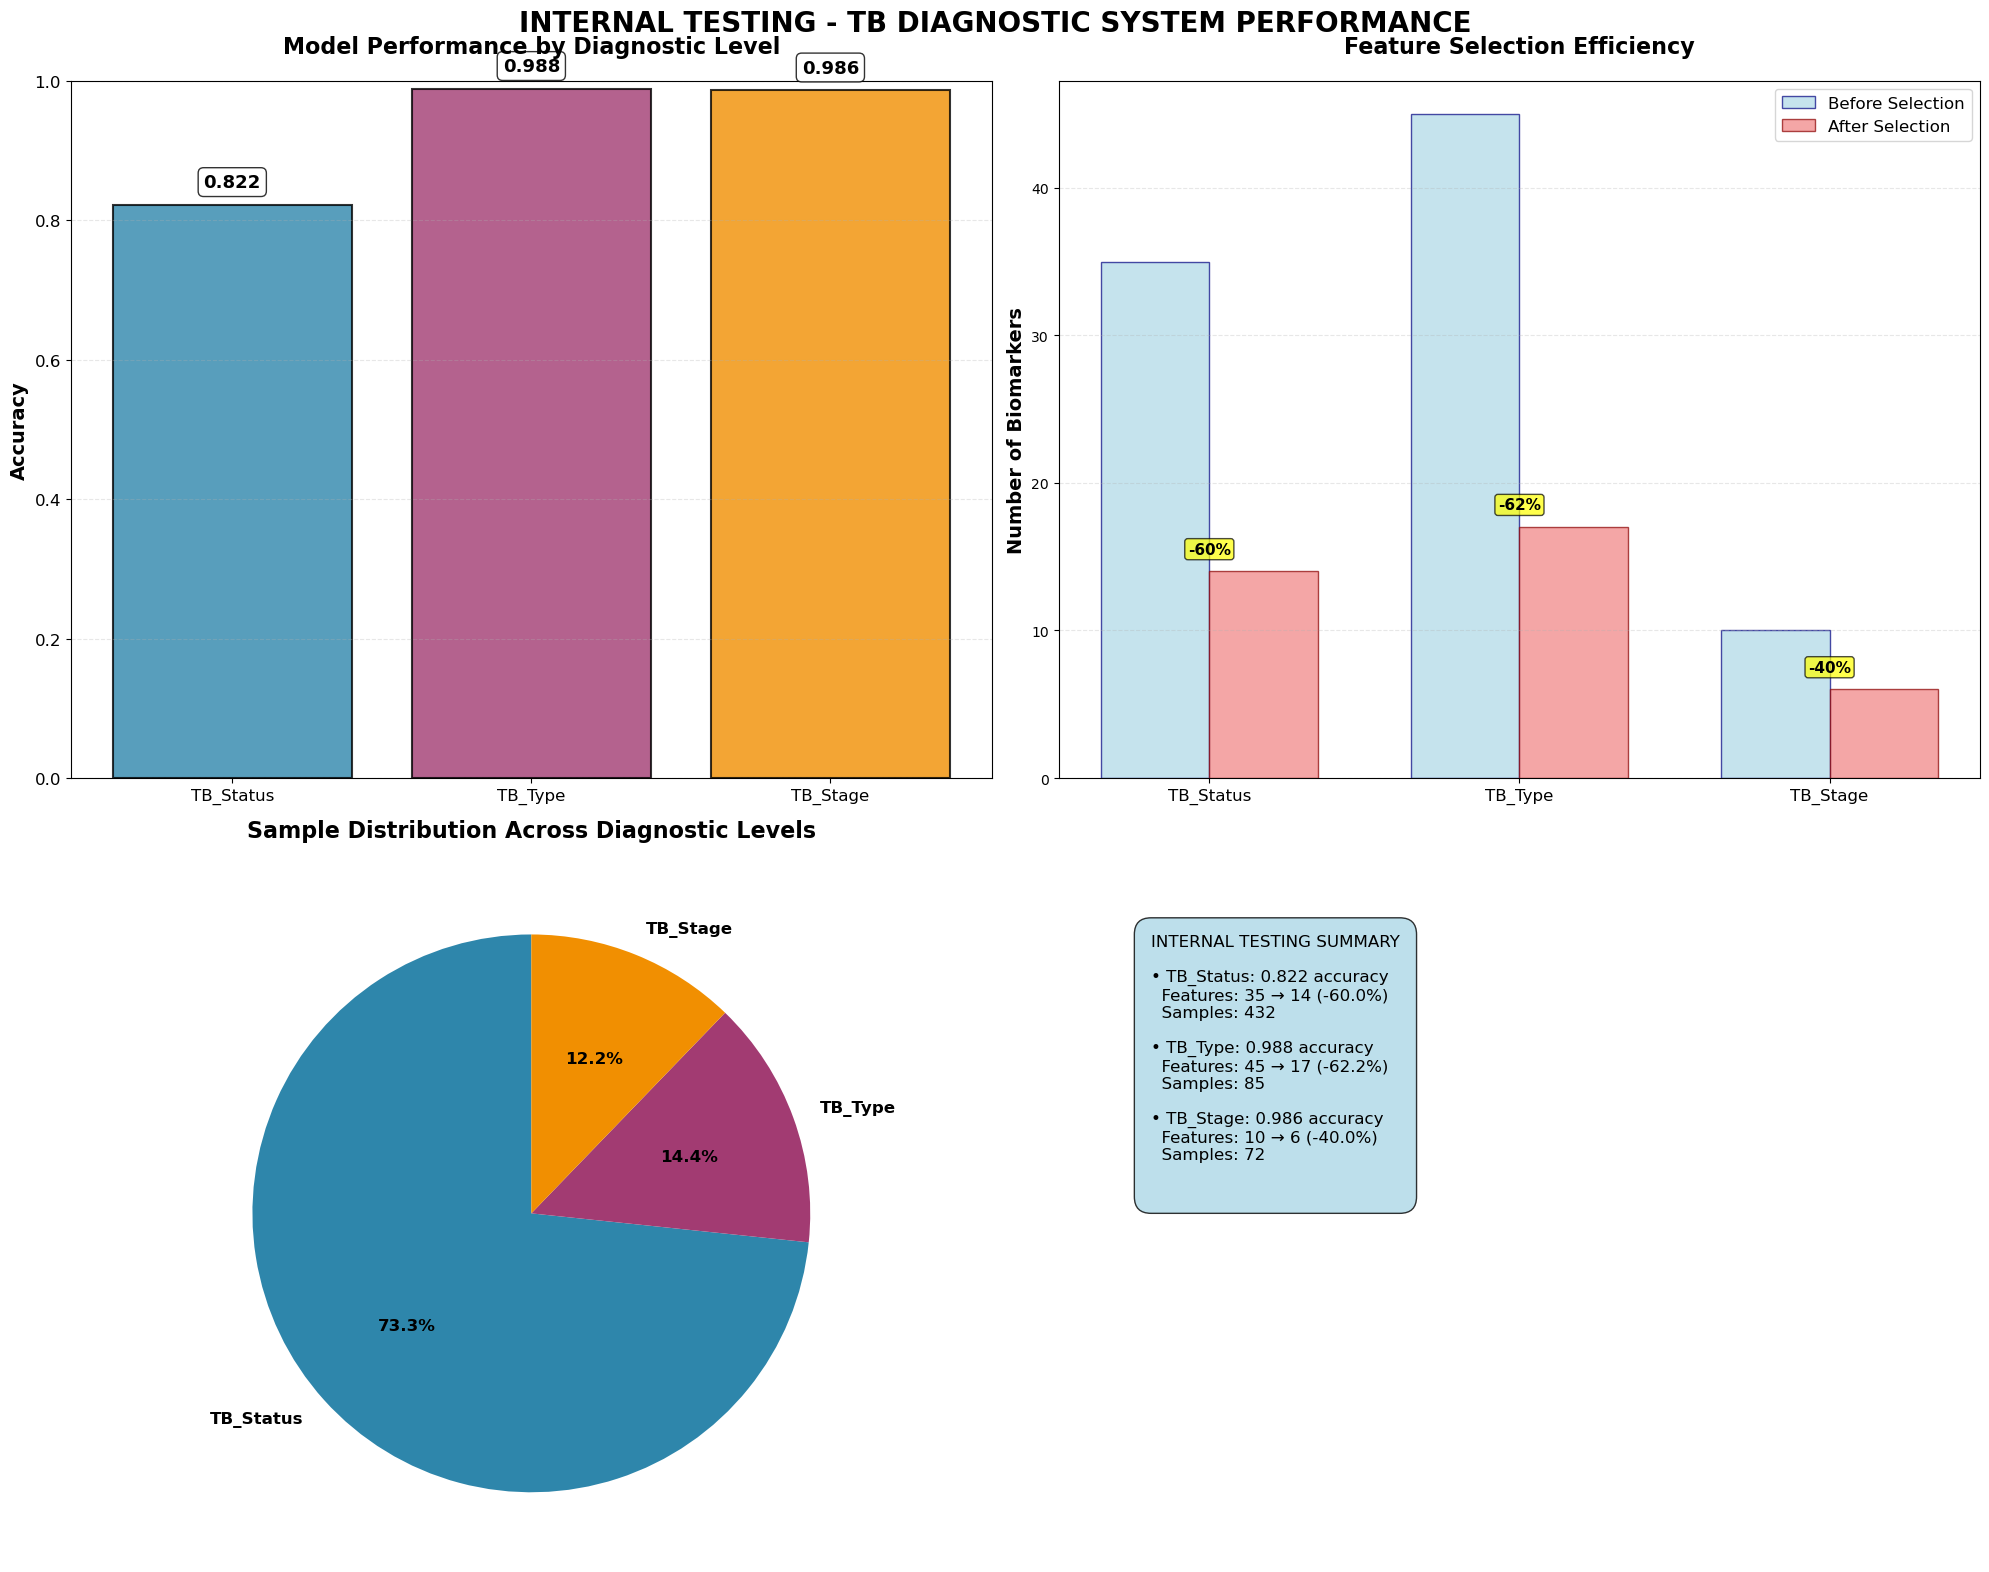

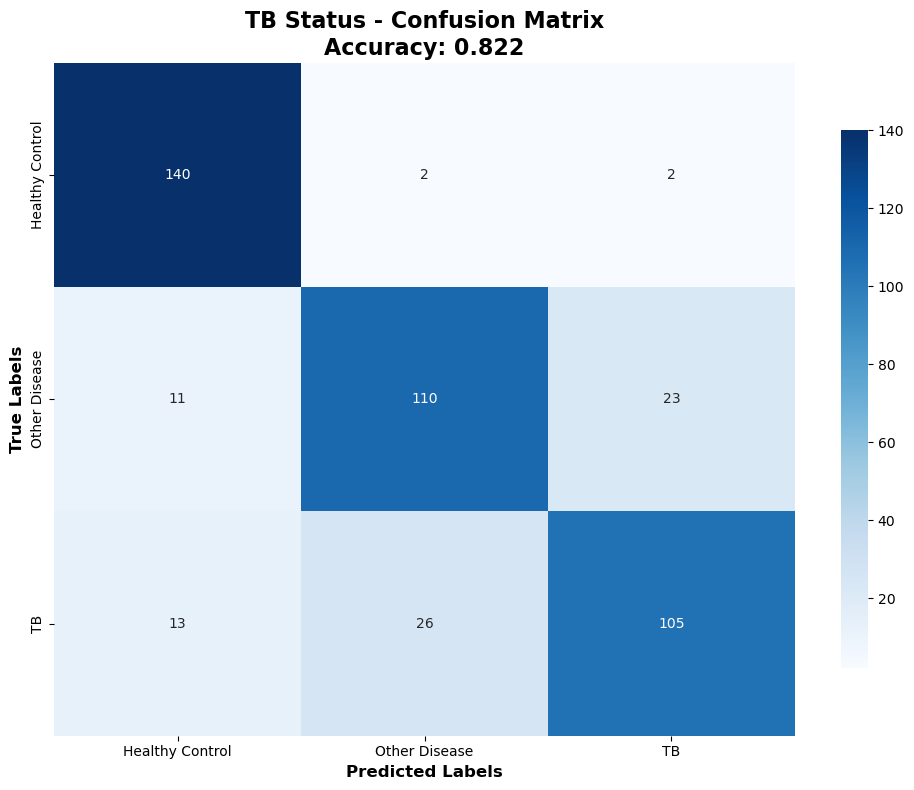

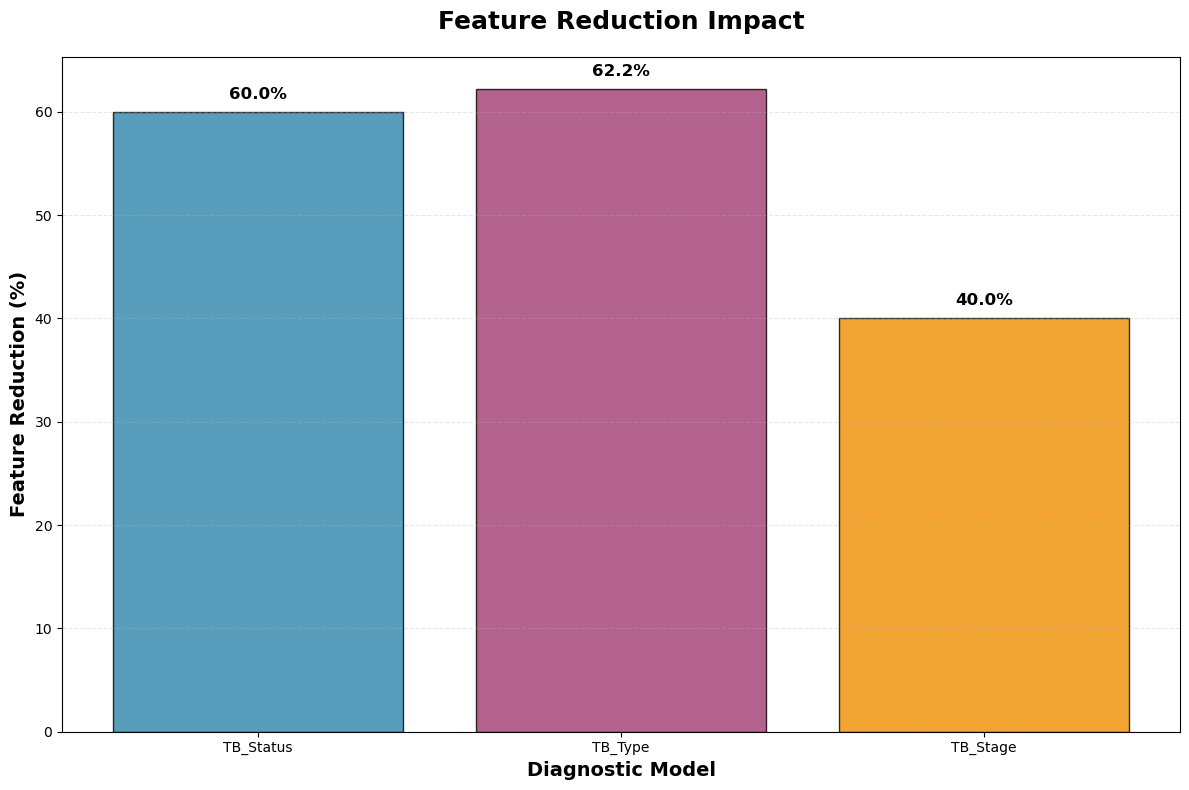

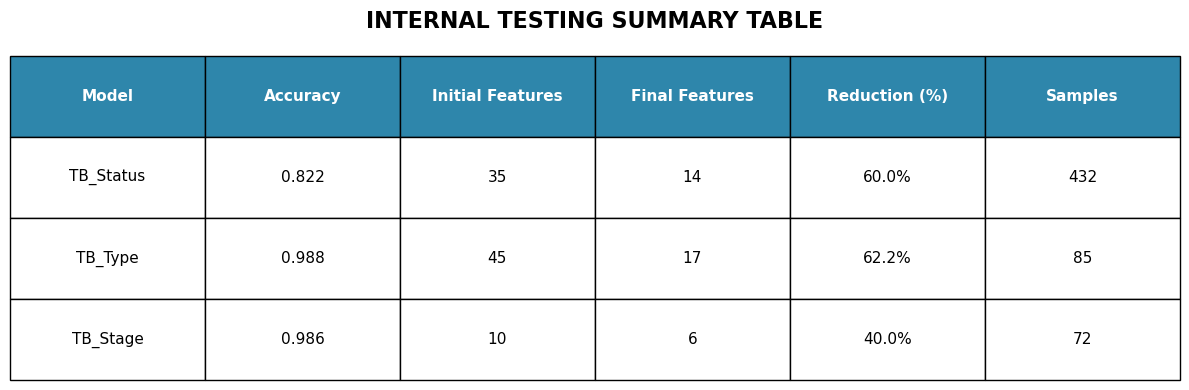

✅ All internal testing visualizations saved to: ..\..\Saved_files\internal_testing

💾 SAVING REPORTS...
✅ Internal testing reports saved to ..\..\Saved_files\internal_testing

🎉 CORRECTED INTERNAL TESTING COMPLETE!

📊 INTERNAL TESTING HIGHLIGHTS:

🏆 PERFORMANCE METRICS:
   • Mean Accuracy: 0.932
   • Total Features: 90 → 37
   • Overall Feature Reduction: 58.9%
   • Total Test Samples: 589

💡 MODEL-SPECIFIC RESULTS:
   • TB_Status: 0.822 accuracy
     Features: 35 → 14 (-60.0%)
     Test Samples: 432
   • TB_Type: 0.988 accuracy
     Features: 45 → 17 (-62.2%)
     Test Samples: 85
   • TB_Stage: 0.986 accuracy
     Features: 10 → 6 (-40.0%)
     Test Samples: 72

📁 OUTPUTS GENERATED:
   • Professional visualizations in 'Saved_files/internal_testing/'
   • Detailed report in 'Saved_files/internal_testing/internal_testing_report.csv'
   • Summary statistics in 'Saved_files/internal_testing/internal_testing_summary.csv'

🎯 READY FOR EXTERNAL VALIDATION!



In [6]:
# Execute Corrected Internal Testing
print("🚀 STARTING CORRECTED INTERNAL TESTING")
print("="*60)

results, detailed_results = perform_corrected_internal_testing()

if results:
    print("\n📈 CREATING VISUALIZATIONS...")
    create_internal_testing_visualizations(results, detailed_results)
    
    print("\n💾 SAVING REPORTS...")
    save_internal_testing_report(results)
    
    # Print summary
    valid_results = {k: v for k, v in results.items() if 'error' not in v}
    if valid_results:
        print("\n" + "="*80)
        print("🎉 CORRECTED INTERNAL TESTING COMPLETE!")
        print("="*80)
        
        accuracies = [v['accuracy'] for v in valid_results.values()]
        initial_features = [v['initial_features'] for v in valid_results.values()]
        final_features = [v['final_features'] for v in valid_results.values()]
        
        print(f"""
📊 INTERNAL TESTING HIGHLIGHTS:

🏆 PERFORMANCE METRICS:
   • Mean Accuracy: {np.mean(accuracies):.3f}
   • Total Features: {sum(initial_features)} → {sum(final_features)}
   • Overall Feature Reduction: {(sum(initial_features) - sum(final_features)) / sum(initial_features) * 100:.1f}%
   • Total Test Samples: {sum([v['samples'] for v in valid_results.values()])}

💡 MODEL-SPECIFIC RESULTS:""")
        
        for model_name, result in valid_results.items():
            reduction_pct = (result['initial_features'] - result['final_features']) / result['initial_features'] * 100
            print(f"   • {model_name}: {result['accuracy']:.3f} accuracy")
            print(f"     Features: {result['initial_features']} → {result['final_features']} (-{reduction_pct:.1f}%)")
            print(f"     Test Samples: {result['samples']}")

        print(f"""
📁 OUTPUTS GENERATED:
   • Professional visualizations in 'Saved_files/internal_testing/'
   • Detailed report in 'Saved_files/internal_testing/internal_testing_report.csv'
   • Summary statistics in 'Saved_files/internal_testing/internal_testing_summary.csv'

🎯 READY FOR EXTERNAL VALIDATION!
""")
    else:
        print("❌ No valid results to summarize")
else:
    print("❌ Internal testing failed")